In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
from scipy.spatial import distance
import glob
from warnings import filterwarnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import classification_report , confusion_matrix
from skimage import io
filterwarnings("ignore")

In [2]:
path  = "../input/face-mask-12k-images-dataset/Face Mask Dataset/"

In [29]:
dataset = {"image_path":[],"mask_status":[],"where":[]}
for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
dataset = pd.DataFrame(dataset)
dataset

,image_path,mask_status,where
0,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
1,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
2,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
3,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
4,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
...,...,...,...
11787,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11788,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11789,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11790,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train


In [30]:
dataset.value_counts("mask_status")

mask_status
WithoutMask    5909
WithMask       5883
dtype: int64

With Mask: 5883,
Without Mask: 5909



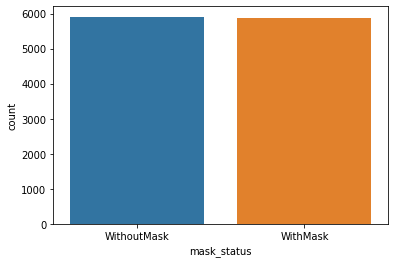

In [31]:
mask = dataset.value_counts("mask_status")[1]
withoutmask = dataset.value_counts("mask_status")[0]

print(f"With Mask: {mask},\nWithout Mask: {withoutmask}\n")
sns.countplot(dataset["mask_status"])
plt.show()

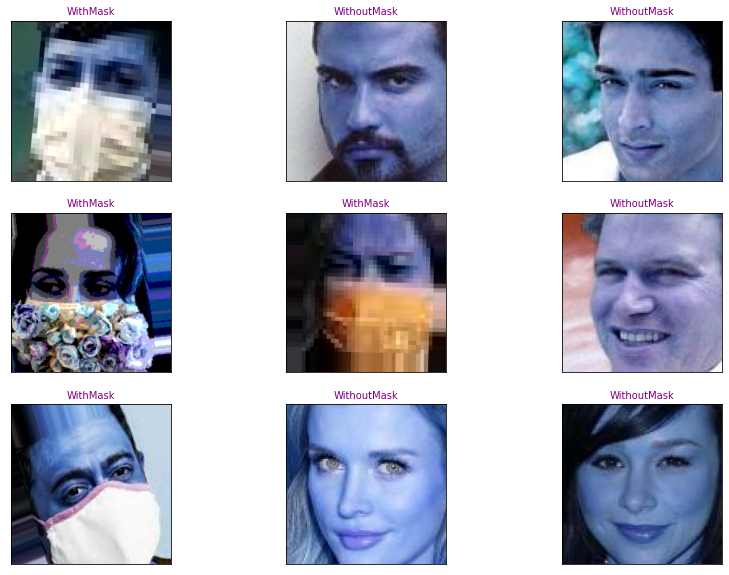

In [32]:
plt.figure(figsize = (14,10))
for i in range(9):
    random = np.random.randint(1,len(dataset))
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size = 10, color = "purple") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [33]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

In [34]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
valid_df = valid_df.sample(frac=1)


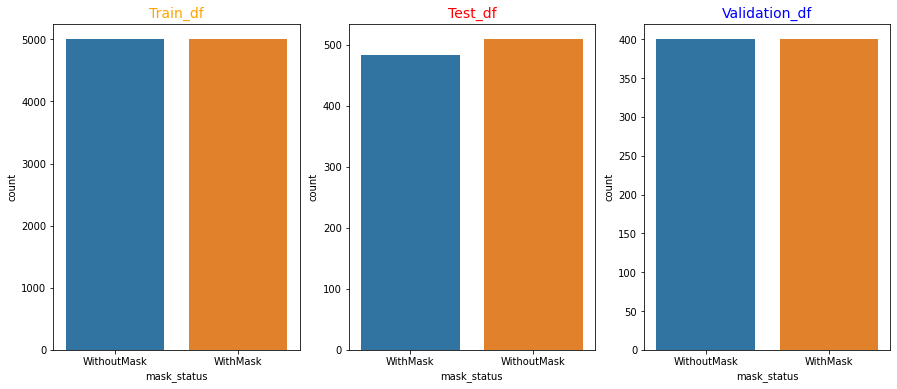

In [35]:
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
sns.countplot(train_df["mask_status"])
plt.title("Train_df", size = 14, color = "orange")


plt.subplot(1,3,2)
sns.countplot(test_df["mask_status"])
plt.title("Test_df", size = 14, color = "red")


plt.subplot(1,3,3)
sns.countplot(valid_df["mask_status"])
plt.title("Validation_df", size = 14, color = "blue")

plt.show()

In [36]:
datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory="../input",
x_col="image_path",
y_col="mask_status",
batch_size=80,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(150,150))

Found 10000 validated image filenames belonging to 2 classes.


In [12]:
valid_generator=datagen.flow_from_dataframe(
dataframe=valid_df,
directory="../input",
x_col="image_path",
y_col="mask_status",
batch_size=80,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(150,150))

Found 800 validated image filenames belonging to 2 classes.


In [13]:
test_generator=datagen.flow_from_dataframe(
dataframe=test_df,
directory="../input",
x_col="image_path",
y_col="mask_status",
batch_size=80,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(150,150))

Found 992 validated image filenames belonging to 2 classes.


In [14]:
image_shape=(150,150,3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [16]:
history = model.fit_generator(train_generator,validation_data  = valid_generator, epochs = 10, steps_per_epoch=(len(train_generator.labels) / 80) ,validation_steps=(len(valid_generator.labels)/80))

Epoch 1/10
125/125 [==============================] - 132s 1s/step - loss: 0.1682 - accuracy: 0.9274 - val_loss: 0.0409 - val_accuracy: 0.9825
Epoch 2/10
125/125 [==============================] - 124s 990ms/step - loss: 0.0482 - accuracy: 0.9834 - val_loss: 0.0468 - val_accuracy: 0.9850
Epoch 3/10
125/125 [==============================] - 124s 991ms/step - loss: 0.0350 - accuracy: 0.9865 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 4/10
125/125 [==============================] - 131s 1s/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 0.0420 - val_accuracy: 0.9825
Epoch 5/10
125/125 [==============================] - 135s 1s/step - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.0143 - val_accuracy: 0.9950
Epoch 6/10
125/125 [==============================] - 136s 1s/step - loss: 0.0158 - accuracy: 0.9944 - val_loss: 0.0103 - val_accuracy: 0.9987
Epoch 7/10
125/125 [==============================] - 136s 1s/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0166 - val_accuracy: 

In [17]:
model.evaluate_generator(test_generator, verbose=1)

13/13 [==============================] - 8s 625ms/step - loss: 0.0252 - accuracy: 0.9909


[0.0252408217638731, 0.9909273982048035]

In [18]:
model.save('face_musk.h5')

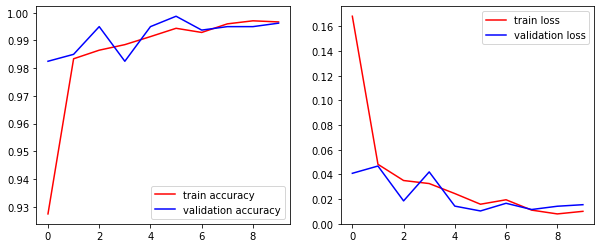

In [19]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label = "train accuracy", color = "red")
plt.plot(history.history["val_accuracy"], label = "validation accuracy", color = "blue")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label = "train loss", color = "red")
plt.plot(history.history["val_loss"], label = "validation loss", color = "blue")

plt.legend()
plt.show()

In [20]:
predictions = model.predict_generator(test_generator, verbose = 1,workers=-1)

13/13 [==============================] - 5s 362ms/step


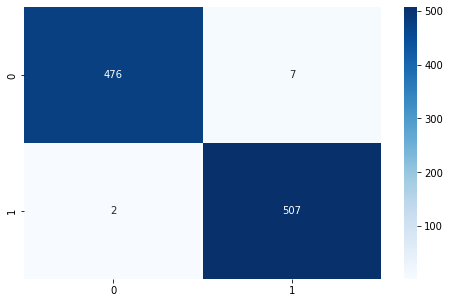

In [21]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(test_generator.labels, predictions.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

In [22]:
print(classification_report(test_generator.labels,predictions.round()))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       483
           1       0.99      1.00      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [23]:
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_alt.xml')

In [24]:
def detect_face(img):
    img = io.imread(img)

    faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.show()

In [26]:
mask_label = {0:'Has Mask!',1:'No Mask'}
dist_label = {0:(0,255,0),1:(255,0,0)}
MIN_DISTANCE = 0
def detect_mask(img):
    img = io.imread(img)

    faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)


    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),1)
    if len(faces)>=1:
        label = [0 for i in range(len(faces))]
        for i in range(len(faces)-1):
            for j in range(i+1, len(faces)):
                dist = distance.euclidean(faces[i][:2],faces[j][:2])
                if dist<MIN_DISTANCE:
                    label[i] = 1
                    label[j] = 1
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(150,150))
            crop = np.reshape(crop,[1,150,150,3])/255.0
            mask_result = model.predict(crop)
            cv2.putText(img,mask_label[round(mask_result[0][0])],(x, y), cv2.FONT_HERSHEY_SIMPLEX,1,dist_label[label[i]],2)
            cv2.rectangle(img,(x,y),(x+w,y+h),dist_label[label[i]],1)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
            
    else:
        print("No Face!")

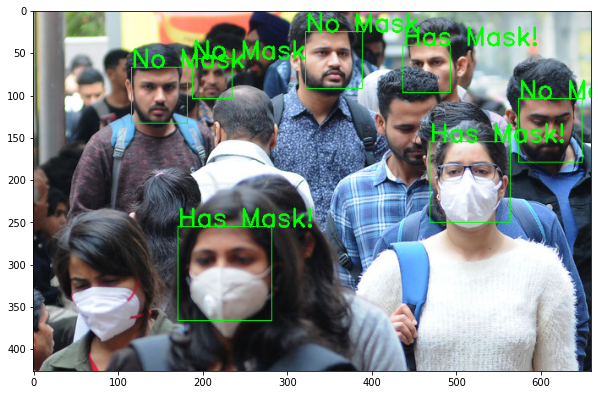

In [37]:
detect_mask("https://englishtribuneimages.blob.core.windows.net/gallary-content/2020/3/Desk/2020_3$largeimg_618252709.jpeg")

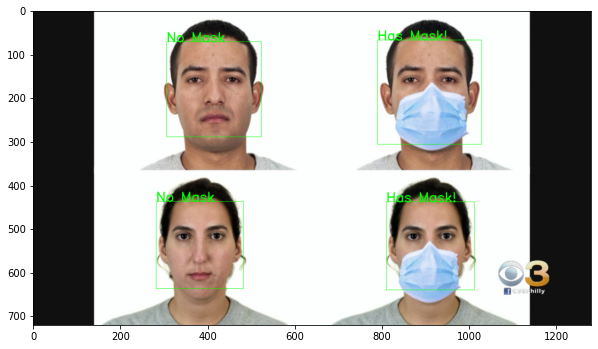

In [38]:
detect_mask("https://philadelphia.cbslocal.com/wp-content/uploads/sites/15116066/2020/08/face-mask-study.jpg")

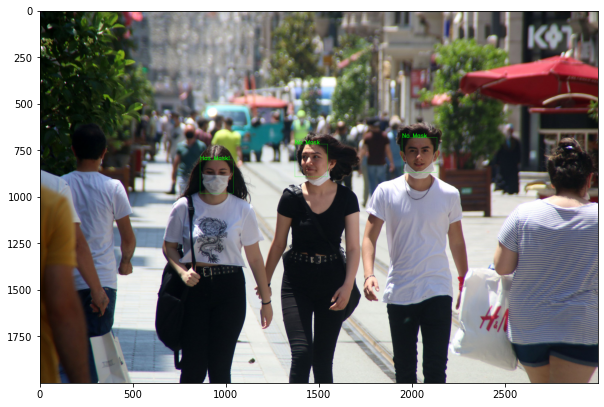

In [39]:
detect_mask('https://idsb.tmgrup.com.tr/ly/uploads/images/2020/06/21/42169.jpg')

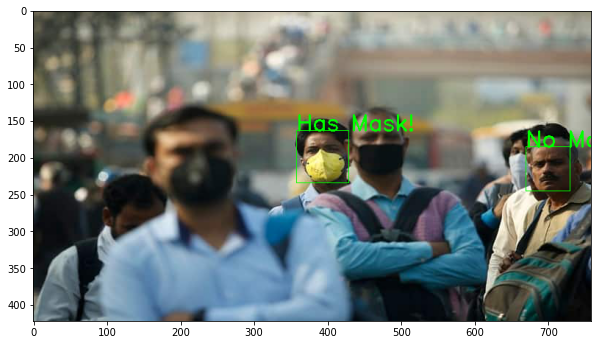

In [40]:
detect_mask("https://images.indianexpress.com/2020/06/corona759.jpg")

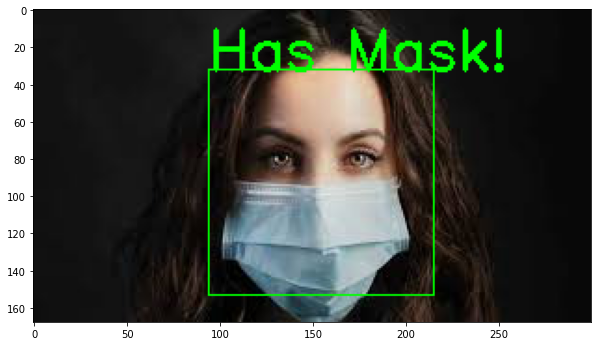

In [41]:
detect_mask("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6avPk-BTuysWjGYT0iZ6Wwe1dcjbPVhdr-g&usqp=CAU")

In [42]:
model.save("classify_model.h5")